In [6]:
import numpy as np
import numpy as np 
import vstats as vs
from thermodynamics import *
import netCDF4 as nc
import matplotlib.pyplot as plt
import smooth as sm
from file_utils import *
from plot_utils import *
%pylab inline
pylab.rcParams['figure.figsize'] = (8.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


In [24]:
nc_un = nc.Dataset('../data/radiation/verticalstats_unpert.nc')
nc_qv = nc.Dataset('../data/radiation/verticalstats_qvpert.nc')
nc_co2 = nc.Dataset('../data/radiation/verticalstats_co2pert.nc') 

In [25]:
swup = getvar('swup',nc_un) 
swup_qv = getvar('swup', nc_qv)
swup_co2 = getvar('swup',nc_co2) 
z =getvar('z',nc_un) 
swdown = getvar('swdown',nc_un) 
swdown_qv = getvar('swdown', nc_qv)
swdown_co2 = getvar('swdown',nc_co2) 
z =getvar('z',nc_un) 


These are the results from two radiative perturbation experiments. 

In the 'qv,qi pert' case, I ran DAM for one timestep using the mean profile from the last 10 day segment of RCE, except I replaced $q_v$ and $q_i$ with the mean profiles from the second 10-day segment after 2xco2 doubling, but did not double co2. 

For the '2xco2 pert' experiment, I simply doubled the co2 concentration and left other variables the same. 

The plots below are of anomalies relative to an identical one-timestep run using the unperturbed mean profile from the 10 days pre-doubling. 

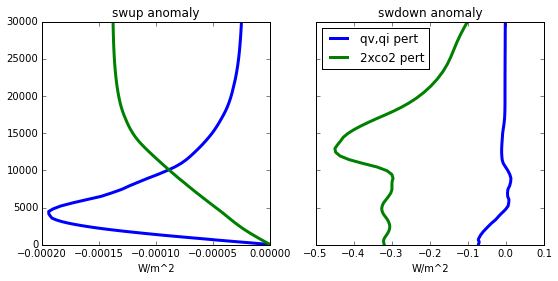

In [34]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize = (9,4)) 
ax1.plot(swup_qv[0,] - swup[0,], z, label = 'qv,qi pert', lw =3) 
ax1.plot(swup_co2[0,] - swup[0,], z, label = '2xco2 pert',lw =3) 
ax2.plot(swdown_qv[0,] - swdown[0,],z,label = 'qv,qi pert',lw =3)
ax2.plot(swdown_co2[0,] - swdown[0,],z,label = '2xco2 pert',lw =3)
ax1.set_ylim(0,30000)
ax1.set_title('swup anomaly') 
ax2.set_title('swdown anomaly') 
ax1.set_xlabel('W/m^2')
ax2.set_xlabel('W/m^2')
ax2.legend(loc = 'upper left')

why is the swup anomaly so small? perhaps if I also altered $q_c$...

In [35]:
lwup = getvar('lwup',nc_un) 
lwup_qv = getvar('lwup', nc_qv)
lwup_co2 = getvar('lwup',nc_co2) 
z =getvar('z',nc_un) 
lwdown = getvar('lwdown',nc_un) 
lwdown_qv = getvar('lwdown', nc_qv)
lwdown_co2 = getvar('lwdown',nc_co2) 
z =getvar('z',nc_un) 

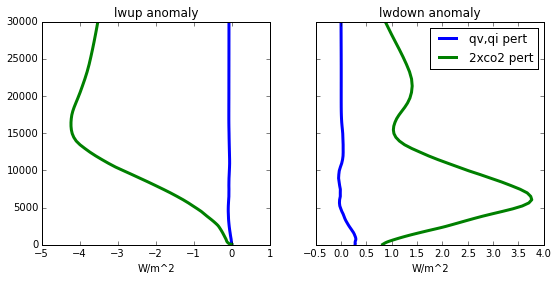

In [37]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, figsize = (9,4)) 
ax1.plot(lwup_qv[0,] - lwup[0,], z, label = 'qv,qi pert', lw =3) 
ax1.plot(lwup_co2[0,] - lwup[0,], z, label = '2xco2 pert',lw =3) 
ax2.plot(lwdown_qv[0,] - lwdown[0,],z,label = 'qv,qi pert',lw =3)
ax2.plot(lwdown_co2[0,] - lwdown[0,],z,label = '2xco2 pert',lw =3)
ax1.set_ylim(0,30000)
ax1.set_title('lwup anomaly') 
ax2.set_title('lwdown anomaly') 
ax1.set_xlabel('W/m^2')
ax2.set_xlabel('W/m^2')
ax2.legend(loc = 'upper right')

cool... can see the emission level around 15km, where longwave CO$_2$ contribution moves from mainly up to down. 